In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# Calibration of Divergences

In [ ]:
# define the pdf for calibration 
from scipy.stats import *
chi2.stats(4)

In [ ]:
# Calibrate the KL and JS divergences
i_stats = 1000
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(loc,scale, i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*scale,2*scale,i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(loc,scale,i_stats),[1,i_stats])
#rayleigh = np.reshape(np.random.rayleigh(scale, i_stats),[1,i_stats])
#chi = np.reshape(np.random.chisquare(4, i_stats),[1,i_stats])

C = np.zeros([4,i_stats])
C[0,:]=uniform
C[1,:]=gaus
C[2,:]=laplacian
C[3,:]=norm_K
#C[4,:]=chi
#StatisticalAnalysis.JSDiv(C,C)
KL_div= StatisticalAnalysis.CreateKLsMatrix(C,C)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(C,C)

In [ ]:
KL_div,SKL_div,JS_div

In [ ]:
SKL_div,JS_div

# Separate the mixtures
 $\to$ Make decision by using the ROOT Fit

# First Mixture 

Fontes:

$s_0$ = Uniforme

$s_1$ = Rayleigh

$s_2$ = Gaussiana

$s_3$ = Laplaciana

$s_4$ = $\chi ^2 $

In [2]:
sources = np.loadtxt(source_path+'/'+'FourthSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'FourthMixMatrix.txt')

x = np.loadtxt(obs_path+'FourthMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [3]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.30842825,  0.31293416,  0.23619994,  0.29351903],
       [ 0.30842825,  1.        ,  0.48132709,  0.48293917,  0.21330623],
       [ 0.31293416,  0.48132709,  1.        ,  0.42433008,  0.2379069 ],
       [ 0.23619994,  0.48293917,  0.42433008,  1.        ,  0.2067612 ],
       [ 0.29351903,  0.21330623,  0.2379069 ,  0.2067612 ,  1.        ]])

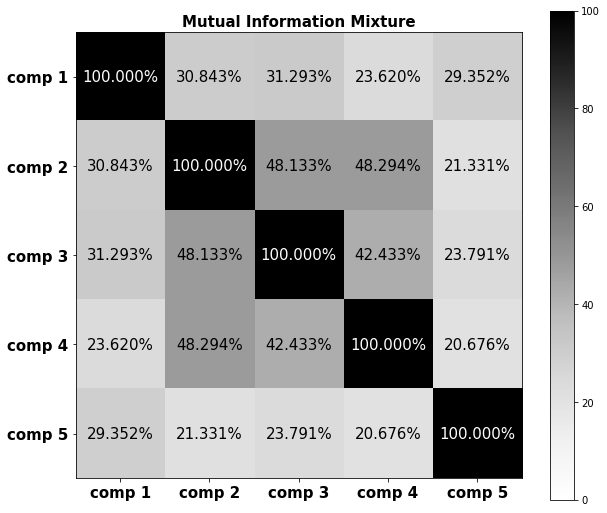

In [4]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run4_mix_MI_100',save=True)

In [5]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.08245721,  0.06922807,  0.04218897,  0.04394293],
       [ 0.08245721,  1.        ,  0.09571986,  0.13902518,  0.13936411],
       [ 0.06922807,  0.09571986,  1.        ,  0.15971576,  0.15827006],
       [ 0.04218897,  0.13902518,  0.15971576,  1.        ,  0.19592028],
       [ 0.04394293,  0.13936411,  0.15827006,  0.19592028,  1.        ]])

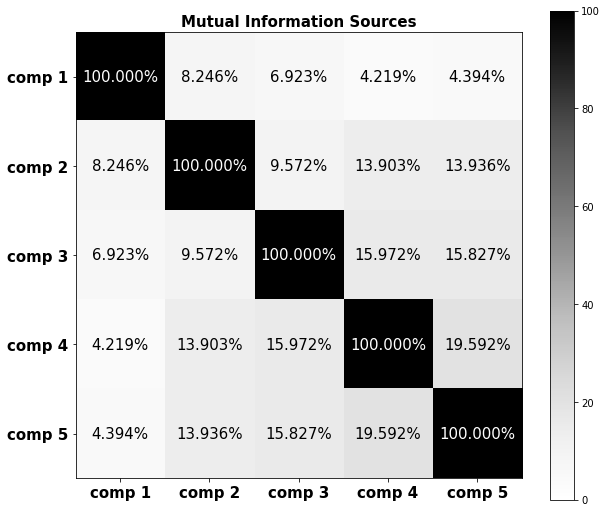

In [6]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run4_sources_MI_100',save=True)

In [7]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(x,sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(x,sources)

KL_div,SKL_div,JS_div

([array([[ 0.41984967,  0.43483291,  0.33773666,  0.41131256,  0.80826303],
         [ 0.48814612,  0.40718605,  0.67459043,  0.67567591,  0.58985168],
         [ 0.39743358,  0.29616096,  0.746658  ,  1.19141748,  0.07106975],
         [ 0.33866686,  0.28122278,  0.45464104,  0.94415035,  0.2948777 ],
         [ 0.41319423,  0.32308277,  0.22133962,  0.2635907 ,  0.76357323]]),
  array([[ 0.49985651,  0.59849275,  0.42268499,  0.4131448 ,  0.35289366],
         [ 0.69040073,  0.66242911,  0.46737558,  0.34982637,  0.35694205],
         [ 0.38310251,  0.55522043,  0.68886735,  0.46684319,  0.17554457],
         [ 0.37827278,  0.6615459 ,  0.91180248,  0.60716051,  0.20431675],
         [ 1.22534784,  0.71089563,  0.06900015,  0.48836467,  0.75226206]])],
 array([[ 0.45985309,  0.51666283,  0.38021083,  0.41222868,  0.58057835],
        [ 0.58927343,  0.53480758,  0.570983  ,  0.51275114,  0.47339687],
        [ 0.39026805,  0.42569069,  0.71776268,  0.82913033,  0.12330716],
        [ 

In [8]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 12
Time to converges the FastICA: 0.011 seconds


In [9]:
print 'E1 = ',amari.amariError(matrix_A,fit.mixing_),'E2 = ',amari.amariError(matrix_A,fit.mixing_,squares=True)

E1 =  22.3555326725 E2 =  14.878549471


In [10]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco


array([[ 1.        ,  0.08602072,  0.07205178,  0.12226137,  0.08811865],
       [ 0.08602072,  1.        ,  0.08136202,  0.11877539,  0.14192591],
       [ 0.07205178,  0.08136202,  1.        ,  0.0936177 ,  0.09253567],
       [ 0.12226137,  0.11877539,  0.0936177 ,  1.        ,  0.20143885],
       [ 0.08811865,  0.14192591,  0.09253567,  0.20143885,  1.        ]])

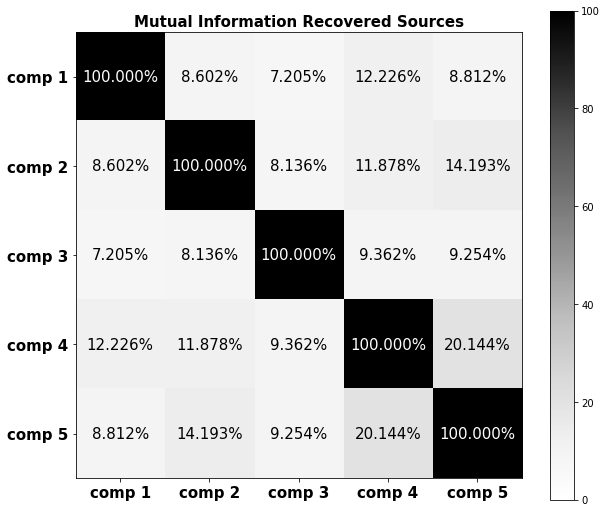

In [11]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run4_reco_MI_100',save=True)

In [12]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.05000878,  0.06635489,  0.64762721,  0.0538048 ,  0.0319667 ],
       [ 0.526988  ,  0.09345967,  0.09668834,  0.14996811,  0.12016138],
       [ 0.10028149,  0.45121023,  0.06834552,  0.13975928,  0.19046867],
       [ 0.12705778,  0.14676103,  0.0908999 ,  0.21790618,  0.68574487],
       [ 0.11669175,  0.15640937,  0.09298146,  0.65453555,  0.2116045 ]])

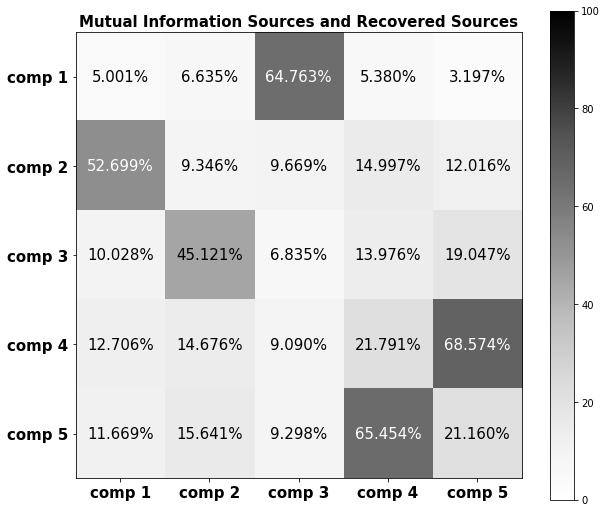

In [13]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run4_sourcesreco_MI_100',save=True)

In [14]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[0,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = recovered_sources[4,:]
ordened_recovered_sources[4,:] = recovered_sources[3,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.64762721,  0.05000878,  0.06635489,  0.0319667 ,  0.0538048 ],
       [ 0.09668834,  0.526988  ,  0.09345967,  0.12016138,  0.14996811],
       [ 0.06834552,  0.10028149,  0.45121023,  0.19046867,  0.13975928],
       [ 0.0908999 ,  0.12705778,  0.14676103,  0.68574487,  0.21790618],
       [ 0.09298146,  0.11669175,  0.15640937,  0.2116045 ,  0.65453555]])

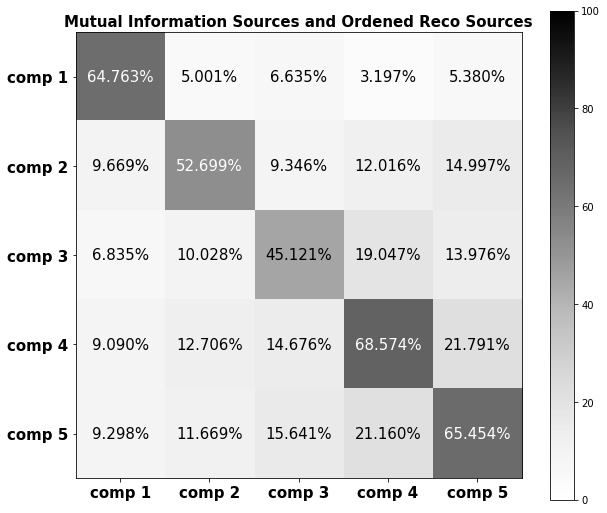

In [15]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run4_sourcesreco_ordened_MI_100',save=True)

In [16]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [17]:
SKL_div,JS_div

(array([[ 0.25078137,  0.24868693,  0.33241524,  0.39939527,  0.48418965],
        [ 0.23858258,  0.24244869,  0.2547965 ,  0.31994959,  0.4542797 ],
        [ 0.25578584,  0.17459803,  0.07899117,  0.36418   ,  0.50791838],
        [ 0.3013196 ,  0.2990295 ,  0.30288878,  0.52202824,  0.61164769],
        [ 0.43814396,  0.41624664,  0.74428488,  0.93612743,  0.03043834]]),
 array([[ 0.1533493 ,  0.17714474,  0.17237557,  0.18716928,  0.23795608],
        [ 0.1605761 ,  0.11043672,  0.15072786,  0.18200677,  0.19063656],
        [ 0.18716162,  0.12635781,  0.05855209,  0.19485056,  0.45964155],
        [ 0.16267593,  0.20630959,  0.18529609,  0.27934858,  0.63783387],
        [ 0.29247611,  0.31590886,  0.32613426,  0.31901844,  0.01521088]]))

In [18]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.153349 &  0.177145 &  0.172376 &  0.187169 &  0.237956 \\
1 &  0.160576 &  0.110437 &  0.150728 &  0.182007 &  0.190637 \\
2 &  0.187162 &  0.126358 &  0.058552 &  0.194851 &  0.459642 \\
3 &  0.162676 &  0.206310 &  0.185296 &  0.279349 &  0.637834 \\
4 &  0.292476 &  0.315909 &  0.326134 &  0.319018 &  0.015211 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.250781 &  0.248687 &  0.332415 &  0.399395 &  0.484190 \\
1 &  0.238583 &  0.242449 &  0.254797 &  0.319950 &  0.454280 \\
2 &  0.255786 &  0.174598 &  0.078991 &  0.364180 &  0.507918 \\
3 &  0.301320 &  0.299030 &  0.302889 &  0.522028 &  0.611648 \\
4 &  0.438144 &  0.416247 &  0.744285 &  0.936127 &  0.030438 \\
\bottomrule
\end{tabular}



In [19]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[  1.20000000e+01,   0.00000000e+00,   0.00000000e+00],
       [  1.10000000e-02,   0.00000000e+00,   0.00000000e+00],
       [  2.23555327e+01,   0.00000000e+00,   0.00000000e+00],
       [  1.48785495e+01,   0.00000000e+00,   0.00000000e+00],
       [  7.00008346e+00,   0.00000000e+00,   0.00000000e+00]])

# Using 1000 stats

In [20]:
sources = np.loadtxt(source_path+'/'+'FourthSource1000Stats.txt')

x = np.loadtxt(obs_path+'FourthMixture1000Stats.txt')


In [21]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.18446641,  0.24595267,  0.14712163,  0.18696994],
       [ 0.18446641,  1.        ,  0.31870161,  0.35681165,  0.13795134],
       [ 0.24595267,  0.31870161,  1.        ,  0.25447201,  0.20890997],
       [ 0.14712163,  0.35681165,  0.25447201,  1.        ,  0.13435876],
       [ 0.18696994,  0.13795134,  0.20890997,  0.13435876,  1.        ]])

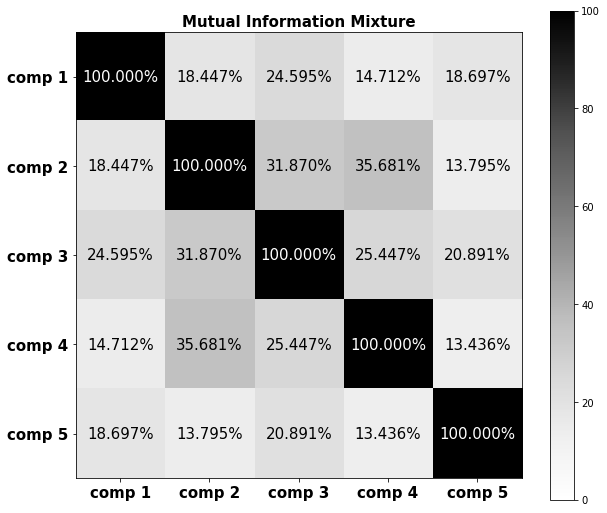

In [22]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run4_mix_MI_1k',save=True)

In [23]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.0183823 ,  0.01586342,  0.02149972,  0.02223749],
       [ 0.0183823 ,  1.        ,  0.04548264,  0.05421429,  0.04767505],
       [ 0.01586342,  0.04548264,  1.        ,  0.07120445,  0.07440705],
       [ 0.02149972,  0.05421429,  0.07120445,  1.        ,  0.07638527],
       [ 0.02223749,  0.04767505,  0.07440705,  0.07638527,  1.        ]])

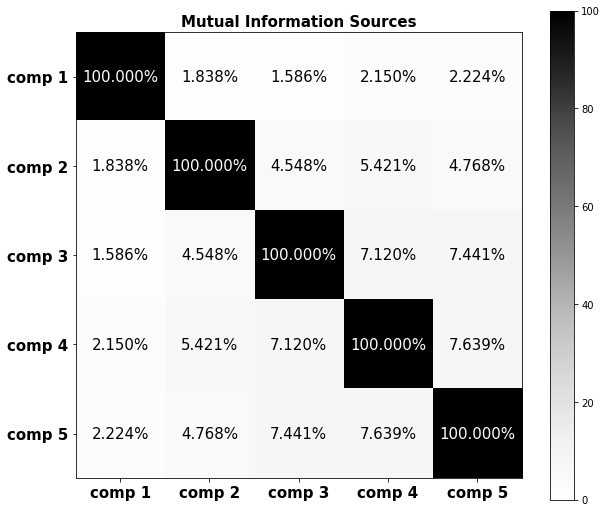

In [24]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run4_sources_MI_1k',save=True)

In [26]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 1021
Time to converges the FastICA: 0.609 seconds


In [27]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.06975712,  0.05647464,  0.08240053,  0.0249214 ],
       [ 0.06975712,  1.        ,  0.05541368,  0.07566237,  0.0204268 ],
       [ 0.05647464,  0.05541368,  1.        ,  0.06091885,  0.0295562 ],
       [ 0.08240053,  0.07566237,  0.06091885,  1.        ,  0.02444619],
       [ 0.0249214 ,  0.0204268 ,  0.0295562 ,  0.02444619,  1.        ]])

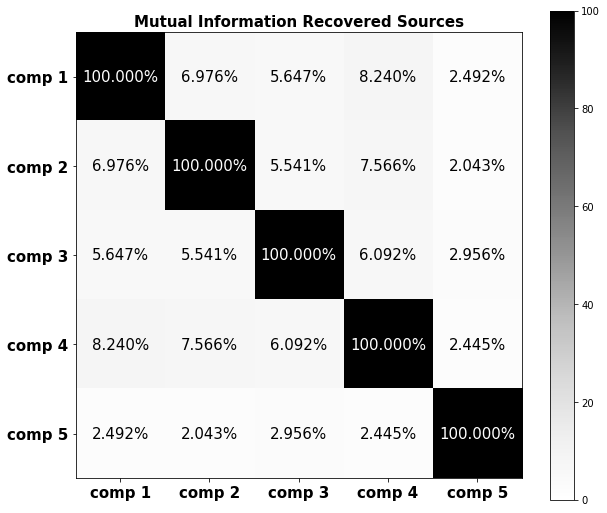

In [28]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run4_reco_MI_1k',save=True)

In [29]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.01866792,  0.01926115,  0.02489157,  0.02211482,  0.75724741],
       [ 0.04991602,  0.06568113,  0.42756098,  0.05584396,  0.0276126 ],
       [ 0.06979554,  0.38855937,  0.07978251,  0.07457743,  0.01944019],
       [ 0.07398329,  0.07120521,  0.05569535,  0.56203196,  0.02655273],
       [ 0.70116398,  0.06660398,  0.05595181,  0.07455551,  0.02458985]])

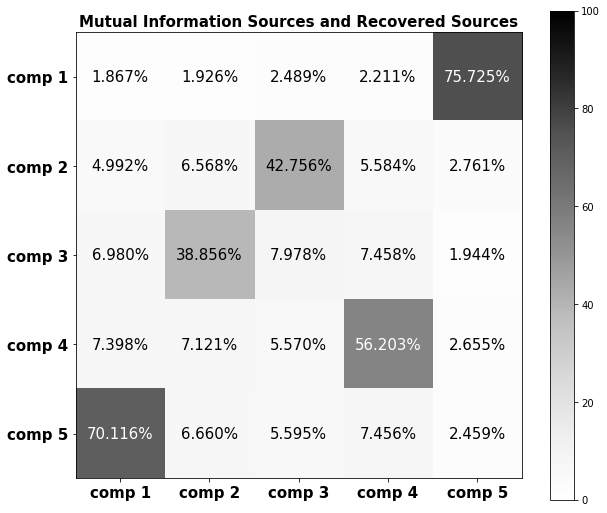

In [30]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run4_sourcesreco_MI_1k',save=True)

In [31]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[4,:]
ordened_recovered_sources[1,:] = recovered_sources[2,:]
ordened_recovered_sources[2,:] = recovered_sources[1,:]
ordened_recovered_sources[3,:] = recovered_sources[3,:]
ordened_recovered_sources[4,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.75724741,  0.02489157,  0.01926115,  0.02211482,  0.01866792],
       [ 0.0276126 ,  0.42756098,  0.06568113,  0.05584396,  0.04991602],
       [ 0.01944019,  0.07978251,  0.38855937,  0.07457743,  0.06979554],
       [ 0.02655273,  0.05569535,  0.07120521,  0.56203196,  0.07398329],
       [ 0.02458985,  0.05595181,  0.06660398,  0.07455551,  0.70116398]])

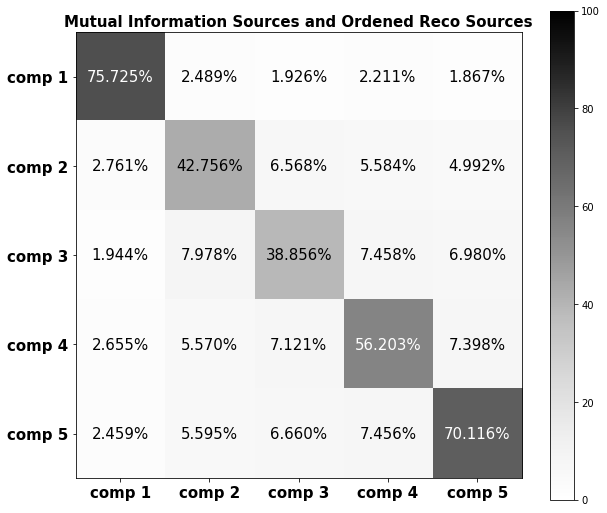

In [32]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run4_sourcesreco_ordened_MI_1k',save=True)

In [33]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [34]:
SKL_div,JS_div

(array([[ 0.07493853,  0.43494346,  0.49665094,  0.68092095,  0.55821084],
        [ 0.26309215,  0.19956994,  0.44276145,  0.64229416,  0.77415196],
        [ 0.36044329,  0.32864521,  0.08781941,  0.22186717,  0.92807753],
        [ 0.5334206 ,  0.41675714,  0.20359921,  0.197279  ,  1.01821275],
        [ 0.44717649,  0.97541914,  0.76819734,  1.02178946,  0.66924592]]),
 array([[ 0.03410905,  0.16806503,  0.18836814,  0.29297217,  0.23922886],
        [ 0.1937531 ,  0.10548065,  0.21553004,  0.23389894,  0.48361756],
        [ 0.26314376,  0.17782841,  0.05606036,  0.10963241,  0.3561822 ],
        [ 0.36009958,  0.27941175,  0.13528389,  0.09828176,  0.38988667],
        [ 0.28244926,  0.30785352,  0.48863716,  0.52670719,  0.34825015]]))

In [35]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.034109 &  0.168065 &  0.188368 &  0.292972 &  0.239229 \\
1 &  0.193753 &  0.105481 &  0.215530 &  0.233899 &  0.483618 \\
2 &  0.263144 &  0.177828 &  0.056060 &  0.109632 &  0.356182 \\
3 &  0.360100 &  0.279412 &  0.135284 &  0.098282 &  0.389887 \\
4 &  0.282449 &  0.307854 &  0.488637 &  0.526707 &  0.348250 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.074939 &  0.434943 &  0.496651 &  0.680921 &  0.558211 \\
1 &  0.263092 &  0.199570 &  0.442761 &  0.642294 &  0.774152 \\
2 &  0.360443 &  0.328645 &  0.087819 &  0.221867 &  0.928078 \\
3 &  0.533421 &  0.416757 &  0.203599 &  0.197279 &  1.018213 \\
4 &  0.447176 &  0.975419 &  0.768197 &  1.021789 &  0.669246 \\
\bottomrule
\end{tabular}



In [36]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.20000000e+01,   1.02100000e+03,   0.00000000e+00],
       [  1.10000000e-02,   6.09000000e-01,   0.00000000e+00],
       [  2.23555327e+01,   2.25374057e+01,   0.00000000e+00],
       [  1.48785495e+01,   1.53058636e+01,   0.00000000e+00],
       [  7.00008346e+00,   6.33188968e+00,   0.00000000e+00]])

# Using 100K stats

In [37]:
sources = np.loadtxt(source_path+'/'+'FourthSource100000Stats.txt')

x = np.loadtxt(obs_path+'FourthMixture100000Stats.txt')


In [38]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.09004801,  0.12912779,  0.05625398,  0.08859019],
       [ 0.09004801,  1.        ,  0.19755668,  0.21561602,  0.05813884],
       [ 0.12912779,  0.19755668,  1.        ,  0.14333496,  0.1116312 ],
       [ 0.05625398,  0.21561602,  0.14333496,  1.        ,  0.04606969],
       [ 0.08859019,  0.05813884,  0.1116312 ,  0.04606969,  1.        ]])

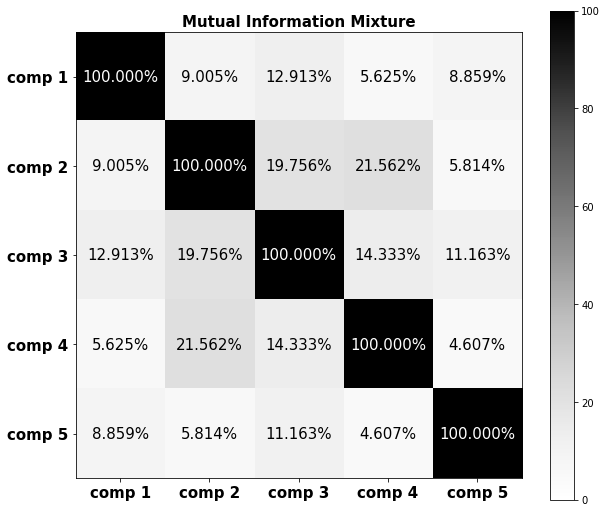

In [39]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run4_mix_MI_100k',save=True)

In [40]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.00244594,  0.00297142,  0.00281701,  0.00247966],
       [ 0.00244594,  1.        ,  0.01184222,  0.0096657 ,  0.01068561],
       [ 0.00297142,  0.01184222,  1.        ,  0.01186676,  0.01256809],
       [ 0.00281701,  0.0096657 ,  0.01186676,  1.        ,  0.01435572],
       [ 0.00247966,  0.01068561,  0.01256809,  0.01435572,  1.        ]])

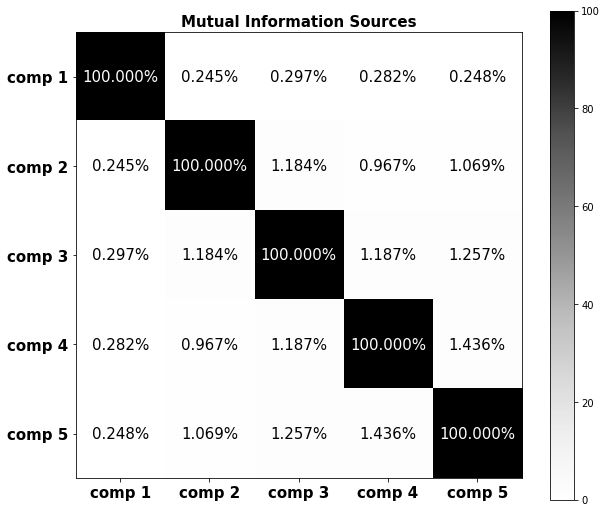

In [41]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run4_sources_MI_100k',save=True)

In [42]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 7
Time to converges the FastICA: 0.334 seconds


In [43]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.00257326,  0.00290437,  0.00257467,  0.00299122],
       [ 0.00257326,  1.        ,  0.01000307,  0.01076996,  0.01242675],
       [ 0.00290437,  0.01000307,  1.        ,  0.01459085,  0.01187158],
       [ 0.00257467,  0.01076996,  0.01459085,  1.        ,  0.0127035 ],
       [ 0.00299122,  0.01242675,  0.01187158,  0.0127035 ,  1.        ]])

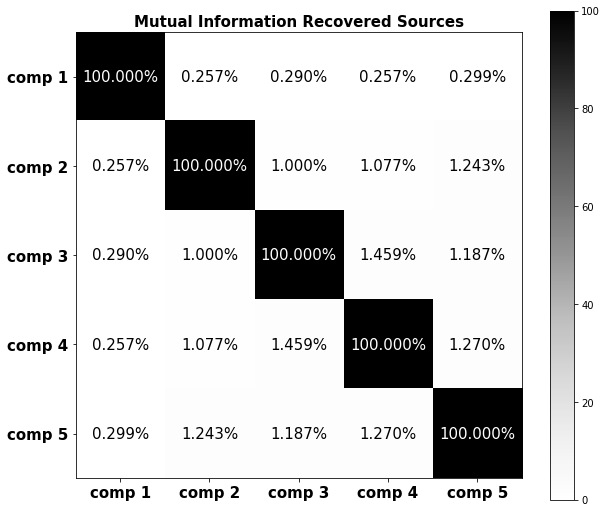

In [44]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run4_reco_MI_100k',save=True)

In [45]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.87505098,  0.00249493,  0.00281654,  0.00254617,  0.00293262],
       [ 0.00267457,  0.6408677 ,  0.00958936,  0.01074526,  0.01219116],
       [ 0.00297566,  0.01284101,  0.01185683,  0.01266346,  0.65792974],
       [ 0.00288018,  0.01003229,  0.87114643,  0.0145243 ,  0.01199107],
       [ 0.00250745,  0.01083187,  0.01426255,  0.8273468 ,  0.01268944]])

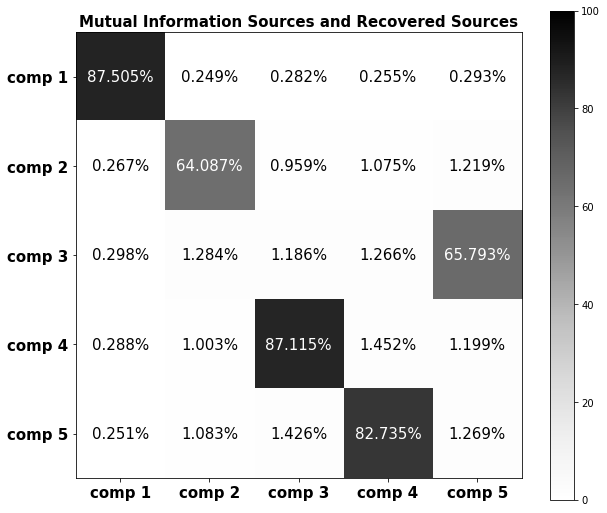

In [46]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run4_sourcesreco_MI_100k',save=True)

In [47]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[0,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[4,:]
ordened_recovered_sources[3,:] = recovered_sources[2,:]
ordened_recovered_sources[4,:] = recovered_sources[3,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.87505098,  0.00249493,  0.00293262,  0.00281654,  0.00254617],
       [ 0.00267457,  0.6408677 ,  0.01219116,  0.00958936,  0.01074526],
       [ 0.00297566,  0.01284101,  0.65792974,  0.01185683,  0.01266346],
       [ 0.00288018,  0.01003229,  0.01199107,  0.87114643,  0.0145243 ],
       [ 0.00250745,  0.01083187,  0.01268944,  0.01426255,  0.8273468 ]])

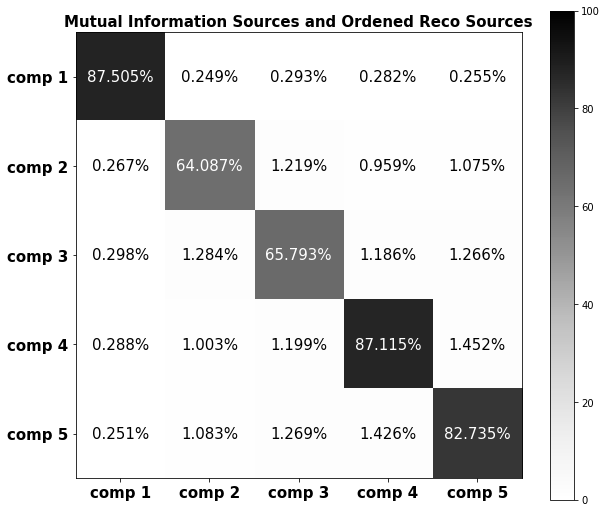

In [48]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run4_sourcesreco_ordened_MI_100k',save=True)

In [49]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [50]:
SKL_div,JS_div

(array([[ 0.03076985,  0.60532394,  0.75505437,  0.88920776,  0.79363776],
        [ 0.37705062,  0.02896697,  1.12723099,  1.37693711,  0.35639367],
        [ 0.40175259,  0.80928967,  0.0195471 ,  0.45597772,  1.36072399],
        [ 0.70546363,  0.82995501,  0.32749324,  0.00607747,  1.44856682],
        [ 0.53321246,  0.37212167,  1.71571028,  1.62769147,  0.01903844]]),
 array([[ 0.01402733,  0.19984259,  0.21094649,  0.36335448,  0.27732353],
        [ 0.30127188,  0.01445282,  0.41156613,  0.42314376,  0.17360396],
        [ 0.37870722,  0.55734473,  0.01061799,  0.16719314,  0.86285411],
        [ 0.44725296,  0.69696704,  0.23023135,  0.00318018,  0.81301364],
        [ 0.4001646 ,  0.18559338,  0.67993585,  0.72669718,  0.00934024]]))

In [51]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.014027 &  0.199843 &  0.210946 &  0.363354 &  0.277324 \\
1 &  0.301272 &  0.014453 &  0.411566 &  0.423144 &  0.173604 \\
2 &  0.378707 &  0.557345 &  0.010618 &  0.167193 &  0.862854 \\
3 &  0.447253 &  0.696967 &  0.230231 &  0.003180 &  0.813014 \\
4 &  0.400165 &  0.185593 &  0.679936 &  0.726697 &  0.009340 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 \\
\midrule
0 &  0.030770 &  0.605324 &  0.755054 &  0.889208 &  0.793638 \\
1 &  0.377051 &  0.028967 &  1.127231 &  1.376937 &  0.356394 \\
2 &  0.401753 &  0.809290 &  0.019547 &  0.455978 &  1.360724 \\
3 &  0.705464 &  0.829955 &  0.327493 &  0.006077 &  1.448567 \\
4 &  0.533212 &  0.372122 &  1.715710 &  1.627691 &  0.019038 \\
\bottomrule
\end{tabular}



In [52]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[  1.20000000e+01,   1.02100000e+03,   7.00000000e+00],
       [  1.10000000e-02,   6.09000000e-01,   3.34000000e-01],
       [  2.23555327e+01,   2.25374057e+01,   1.66175367e+01],
       [  1.48785495e+01,   1.53058636e+01,   1.02344443e+01],
       [  7.00008346e+00,   6.33188968e+00,   6.06655881e+00]])

In [53]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &          0 &            1 &          2 \\
\midrule
0 &  12.000000 &  1021.000000 &   7.000000 \\
1 &   0.011000 &     0.609000 &   0.334000 \\
2 &  22.355533 &    22.537406 &  16.617537 \\
3 &  14.878549 &    15.305864 &  10.234444 \\
4 &   7.000083 &     6.331890 &   6.066559 \\
\bottomrule
\end{tabular}

